# Project 3 Time Series Forecasting

In [10]:
import warnings
warnings.simplefilter('ignore')

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Loading dataset

data = pd.read_csv("C:\Sharath\DATA SETS\PROJECT 3\AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [14]:
# Converting into datetime format

dateparser = lambda dates : pd.datetime.strptime(dates,'%Y-%m')
data = pd.read_csv("C:\Sharath\DATA SETS\PROJECT 3\AirPassengers.csv",
                  parse_dates=['Month'],index_col='Month',date_parser=dateparser)

In [18]:
#Convert to time series

ts = data['#Passengers']

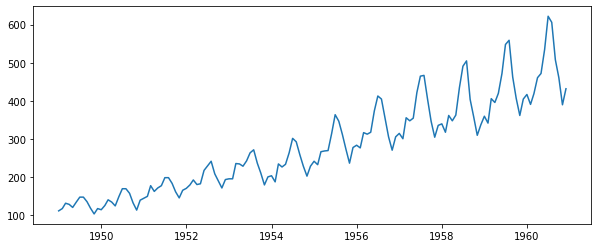

In [20]:
# Checking for stationarity
# plot the ts

plt.figure(figsize=(10,4))
plt.plot(ts)

In [30]:
#Functionality to check the stationarity

from statsmodels.tsa.stattools import adfuller
def stationarity_test(ts):
    
    #Rolling statistics
    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()
    
    #Plot rolling statistics
    plt.figure(figsize=(10,5))
    orginal = plt.plot(ts,color='blue',label='Orginal')
    mean = plt.plot(rolmean,color='red',label='Rolling mean')
    std = plt.plot(rolstd,color='black',label='Rolling std')
    plt.legend()
    plt.title("Rolling Mean and Standard")
    plt.show()
    
    #Perform dickey-fuller test
    print("Result of Dickey-Fuller test")
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

**If the P-Value is less than 0.05 and Test statistic & critical value is appprox same then the data is in stationary**

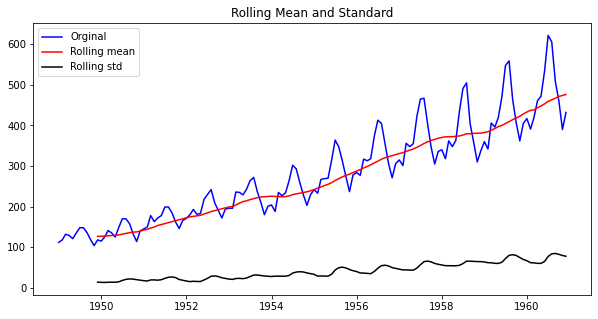

Result of Dickey-Fuller test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [33]:
stationarity_test(ts)

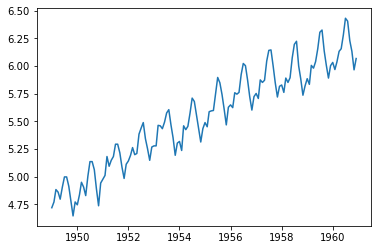

In [35]:
# Making Ts stationary
# Estimating and Eliminating Trend

ts_log = np.log(ts)
plt.plot(ts_log)

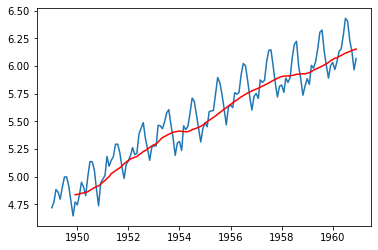

In [42]:
# Smoothing
#Moving Average

moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg,color='red')

In [43]:
#Difference b/w ts_log and moving_avg

ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [48]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

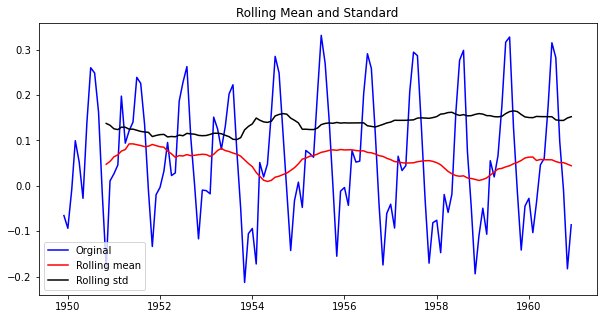

Result of Dickey-Fuller test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [50]:
stationarity_test(ts_log_moving_avg_diff)

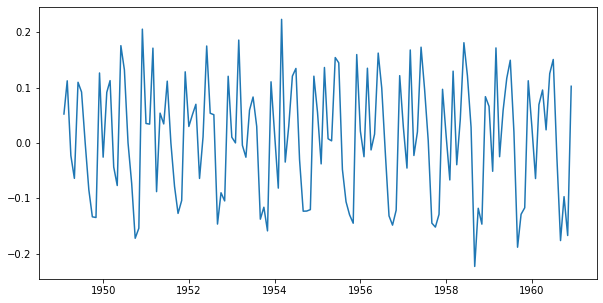

In [52]:
# Eliminating Trend and seasonality
#Take first difference

plt.figure(figsize=(10,5))
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

<Figure size 864x432 with 0 Axes>

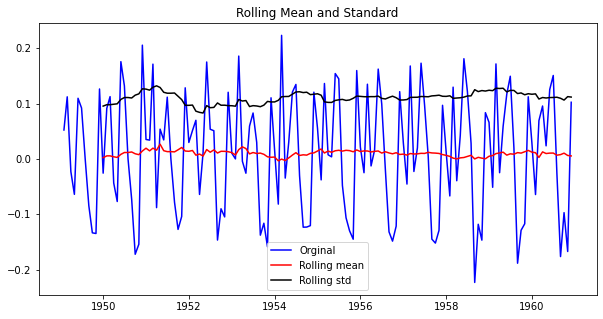

Result of Dickey-Fuller test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [54]:
plt.figure(figsize=(12,6))
ts_log_diff.dropna(inplace=True)
stationarity_test(ts_log_diff)

**Final Forecasting**

**AR Model**

Text(0.5, 1.0, 'RSS : 0.0003')

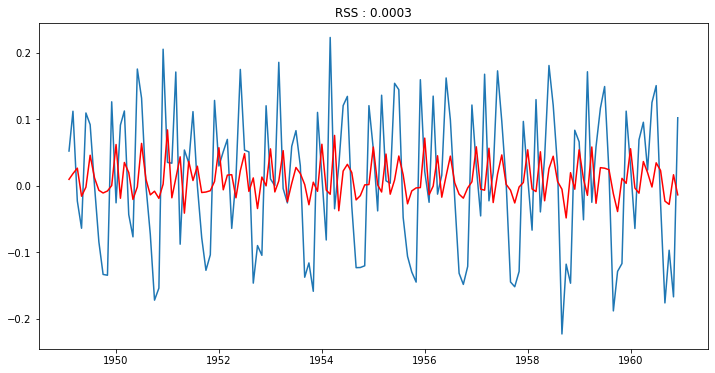

In [57]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log,order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS : %.4f'% sum(results_AR.fittedvalues - ts_log_diff)**2)

**MA MODEL**

Text(0.5, 1.0, 'RSS : 0.0013')

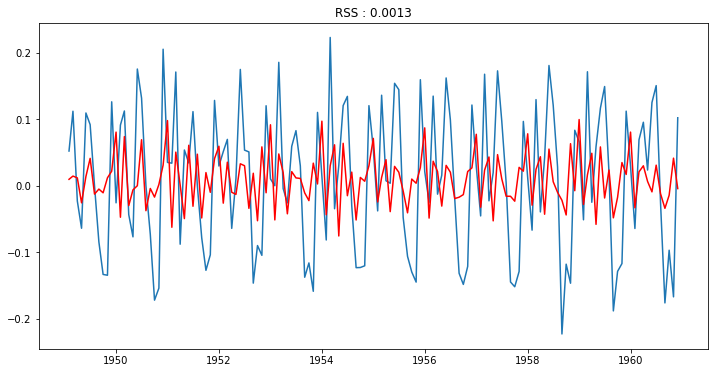

In [60]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log,order=(0,1,2))
results_ma = model.fit(disp=-1)
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.plot(results_ma.fittedvalues,color='red')
plt.title('RSS : %.4f'% sum(results_ma.fittedvalues - ts_log_diff)**2)

**ARIMA Model**

Text(0.5, 1.0, 'RSS : 0.0585')

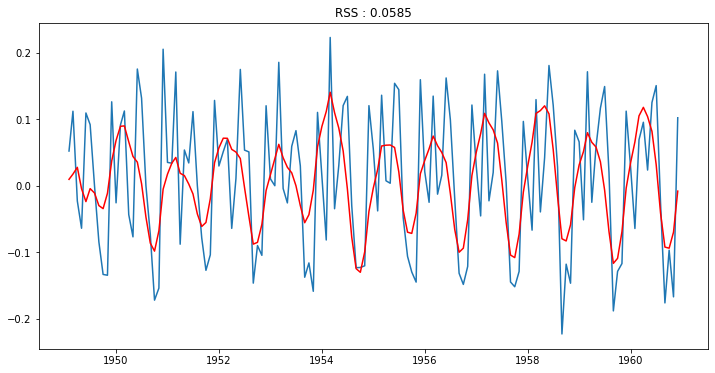

In [70]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log,order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS : %.4f'% sum(results_ARIMA.fittedvalues - ts_log_diff)**2)

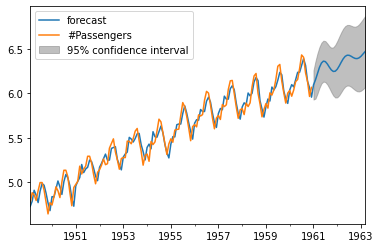

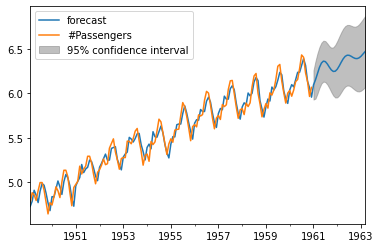

In [71]:
results_ARIMA.plot_predict(1,170)

**ARIMA Model for ts_log_moving_diff**

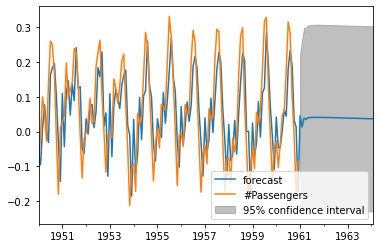

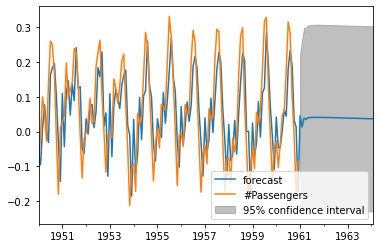

In [84]:
model2 = ARIMA(ts_log_moving_avg_diff,order=(2,1,2))
results_ARIMA2 = model2.fit(disp=-1)
results_ARIMA2.plot_predict(1,170)

**ARIMA Model for ts_log_diff**

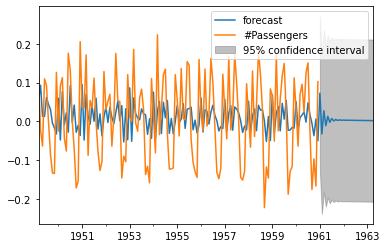

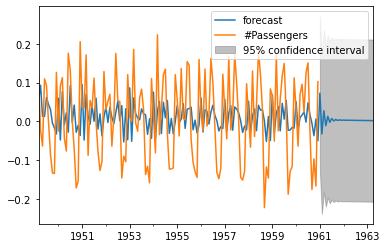

In [85]:
model3 = ARIMA(ts_log_diff,order=(2,1,2))
results_ARIMA3 = model3.fit(disp=-1)
results_ARIMA3.plot_predict(1,170)